## Linear regression

w[0]: 0.393906  b: -0.031804


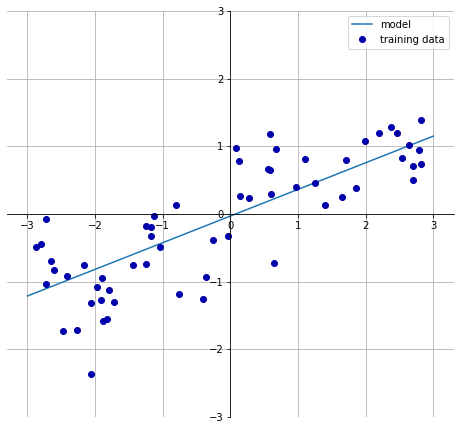

In [1]:
import mglearn
from sklearn.model_selection import train_test_split

mglearn.plots.plot_linear_regression_wave()

In [2]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef__ {}".format(lr.coef_)) # slope
print("lr.inetercept_ {}".format(lr.intercept_)) # offset

print("training score {}".format(lr.score(X_train, y_train)))
print("test score {}".format(lr.score(X_test, y_test)))

lr.coef__ [0.39390555]
lr.inetercept_ -0.031804343026759746
training score 0.6700890315075756
test score 0.65933685968637


In [3]:
## using Boston Housing Dataset

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

# print("lr.coef__ {}".format(lr.coef_)) # slope
# print("lr.inetercept_ {}".format(lr.intercept_)) # offset

# the model is overfitted
print("training score {}".format(lr.score(X_train, y_train)))
print("test score {}".format(lr.score(X_test, y_test)))

training score 0.9520519609032727
test score 0.6074721959665933


In [4]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ridge Regression

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("training score {}".format(ridge.score(X_train, y_train)))
print("test score {}".format(ridge.score(X_test, y_test)))

training score 0.885796658517094
test score 0.752768348174475


In [6]:
# changing the alpha of the model
# so it become more general
# default 1.0
ridge10 = Ridge(alpha=5).fit(X_train, y_train)
print("training score {}".format(ridge10.score(X_train, y_train)))
print("test score {}".format(ridge10.score(X_test, y_test)))

ridgep3 = Ridge(alpha=.3).fit(X_train, y_train)
print("training score {}".format(ridgep3.score(X_train, y_train)))
print("test score {}".format(ridgep3.score(X_test, y_test)))

training score 0.8223977022483582
test score 0.681257265743249
training score 0.9136488850790492
test score 0.7732413227836913


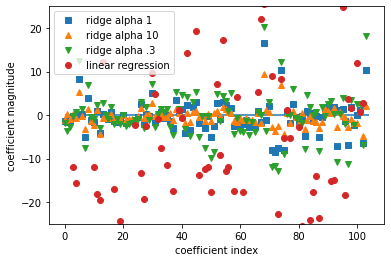

In [7]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label='ridge alpha 1')
plt.plot(ridge10.coef_, '^', label='ridge alpha 10')
plt.plot(ridgep3.coef_, 'v', label='ridge alpha .3')

plt.plot(lr.coef_, 'o', label='linear regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(loc='best')

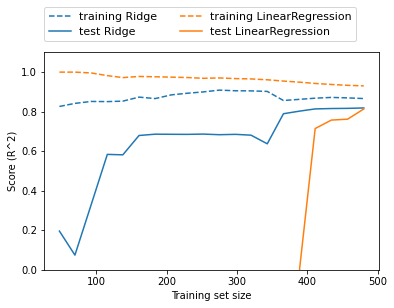

In [8]:
# shows example of learning curves between
# linear regression ans Ridge
mglearn.plots.plot_ridge_n_samples()

## Lasso

In [9]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)

# lasso can make 0 value for the coefficients
print("Train Accuracy {}".format(lasso.score(X_train, y_train)))
print("Test Accuracy {}".format(lasso.score(X_test, y_test)))
print("Number of feature used {}".format(np.sum(lasso.coef_ != 0)))

Train Accuracy 0.29323768991114607
Test Accuracy 0.20937503255272294
Number of feature used 4


Train Accuracy alpha: 1 0.29323768991114607
Test Accuracy alpha: 1 0.20937503255272294
Number of feature used alpha: 1 4
Train Accuracy alpha: 0.01 0.8962226511086497
Test Accuracy alpha: 0.01 0.7656571174549981
Number of feature used alpha: 0.01 33
Train Accuracy alpha: 0.0001 0.9507158754515463
Test Accuracy alpha: 0.0001 0.6437467421272816
Number of feature used alpha: 0.0001 96


Text(0, 0.5, 'coef magnitude')

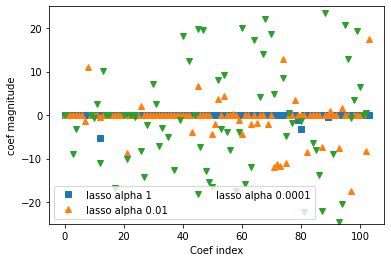

In [10]:
for alpha, symbols in zip([1, 0.01, 0.0001], ['s', '^', 'v']):
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    print("Train Accuracy alpha: {} {}".format(alpha, lasso.score(X_train, y_train)))
    print("Test Accuracy alpha: {} {}".format(alpha, lasso.score(X_test, y_test)))
    print("Number of feature used alpha: {} {}".format(alpha, np.sum(lasso.coef_ != 0)))

    plt.plot(lasso.coef_, symbols, label="lasso alpha {}".format(alpha))

plt.legend(loc='best', ncol=2)
plt.ylim(-25,25)
plt.xlabel('Coef index')
plt.ylabel('coef magnitude')

## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

# using breast cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logistricReg = LogisticRegression().fit(X_train, y_train)
print("train accuracy {}".format(logistricReg.score(X_train, y_train)))
print("test accuracy {}".format(logistricReg.score(X_test, y_test)))

train accuracy 0.9460093896713615
test accuracy 0.958041958041958


Traning Accuracy 0.960 C:1
Test accuracy 0.958 C:1
Traning Accuracy 0.986 C:100
Test accuracy 0.979 C:100
Traning Accuracy 0.373 C:0.0001
Test accuracy 0.371 C:0.0001


(-5.0, 5.0)

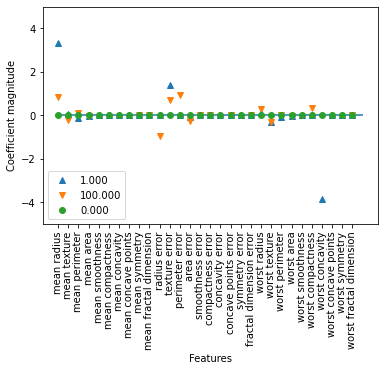

In [23]:
# logistic regression by default using L2 regularization
# now try using L1 regularzation and multiple C value
# using L1 only if there are only few feature that are important
for C, marker in zip([1,100,.0001], ['^','v','o']):
    logistricRegL1 = LogisticRegression(solver='liblinear',penalty='l1', C=C).fit(X_train, y_train)
    print("Traning Accuracy {:.3f} C:{}".format(logistricRegL1.score(X_train, y_train), C))
    print("Test accuracy {:.3f} C:{}".format(logistricRegL1.score(X_test, y_test), C))
    plt.plot(logistricRegL1.coef_.T, marker, label="{:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylabel("Coefficient magnitude")
plt.xlabel("Features")
plt.legend(loc=3)
plt.ylim(-5,5)

## Linear models for multiclass classification

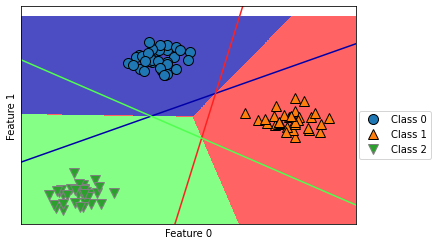

In [32]:
# using one vs rest approach 
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

from sklearn.svm import LinearSVC

linearSVC = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_classification(linearSVC, X, fill=True, alpha=.7)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linearSVC.coef_, linearSVC.intercept_, mglearn.cm3.colors):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"], loc=[1.01, .3])